In [26]:
import h2o as H2O
import pandas as pd
from h2o.automl import H2OAutoML
# import mathplotlib
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 39 mins
H2O_cluster_timezone:,America/Asuncion
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_davidnunez_7arucy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.988 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [27]:
model:H2O.model.ModelBase = h2o.load_model('/Users/davidnunez/Desktop/tesis/tesis-model/Training/train2021/smoteModelv8/DeepLearning_grid_1_AutoML_2_20230803_150444_model_3')

In [28]:
y = 'Protestas'
df_2022 = pd.read_csv('../df_dummizado_from_2021.csv', index_col=False)
df_2022 = df_2022[df_2022['date.year'] == 2022]

df_2022.to_csv('df_2022.csv', index = False, encoding='utf-8') # False: not include index
# df_2022 = df.s

test = h2o.H2OFrame.from_python(df_2022)
test[y] = test[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
# model.show()
# confusion_matrix(metrics=None, thresholds=None)
model.model_performance(test).confusion_matrix()

,False,True,Error,Rate
False,15527.0,3139.0,0.1682,(3139.0/18666.0)
True,1102.0,2216.0,0.3321,(1102.0/3318.0)
Total,16629.0,5355.0,0.1929,(4241.0/21984.0)


In [22]:
model.show()

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_2_20230803_150444_model_3


Status of Neuron Layers: predicting Protestas, 2-class classification, bernoulli distribution, CrossEntropy loss, 39,002 weights/biases, 604.4 KB, 5,400,620 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms          mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  ------------------  -------------------  ------------------
    1        777      Input             10.0
    2        50       RectifierDropout  50.0       0.0   0.0   0.3011831064027687     0.39301133155822754    0.0         0.1749812281985318     0.7866406440734863  0.46188401746011165  0.2144700288772583
    3        2        Softmax                      0.0   0.0   0.0010032678047355147  0.0032628513872623444  0.0         -0.022091781720519066  0.684384822845459   -0.1631438124158502  1.4248104095458984

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.6361379696421782
RMSE: 0.7975825785723872
LogLoss: 3.5368197320139827
Mean Per-Class Error: 0.10407974666521008
AUC: 0.9198538511533879
AUCPR: 0.7718129668280513
Gini: 0.8397077023067758

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999933082115005
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  6424     639     0.0905   (639.0/7063.0)
True   338      2534    0.1177   (338.0/2872.0)
Total  6762     3173    0.0983   (977.0/9935.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999993     0.838379  0
max f2                       0.999993     0.864198  0
max f0point5                 0.999993     0.814058  0
max accuracy                 0.999993     0.901661  0
max precision                0.999993     0.798613  0
max recall                   0.626499     1         323
max specificity              0.999993     0.909529  0
max absolute_mcc             0.999993     0.769931  0
max min_per_class_accuracy   0.999854     0.883194  1
max mean_per_class_accuracy  0.999993     0.89592   0
max tns                      0.999993     6424      0
max fns                      0.999993     338       0
max fps                      3.55211e-06  7063      399
max tps                      0.626499     2872      323
max tnr                      0.999993     0.909529  0
max fnr                      0.999993     0.117688  0
max fpr                      3.55211e-06  1         399
max tpr                      0.626499     1         323

Gains/Lift Table: Avg response rate: 28.91 %, avg score: 95.36 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0997484                   1                  3.4069     3.4069             0.984864         1         0.984864                    1                   0.339833        0.339833                   240.69    240.69             0.337709
2        0.106593                    1                  3.40839    3.407              0.985294         1         0.984891                    1                   0.0233287       0.363162                   240.839   240.7              0.360896
3        0.150075                    1  

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_2_20230803_150444_model_3

,False,True,Error,Rate
False,15527.0,3139.0,0.1682,(3139.0/18666.0)
True,1102.0,2216.0,0.3321,(1102.0/3318.0)
Total,16629.0,5355.0,0.1929,(4241.0/21984.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

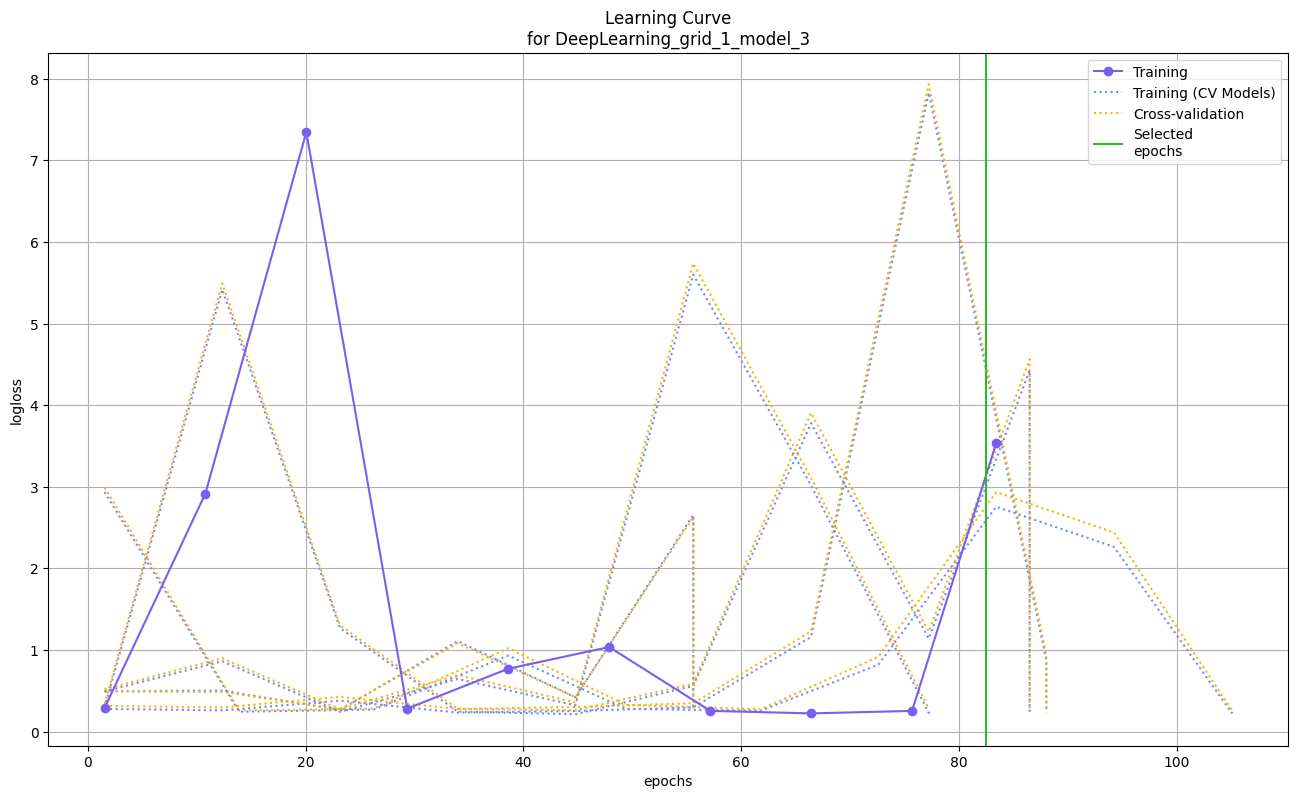

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

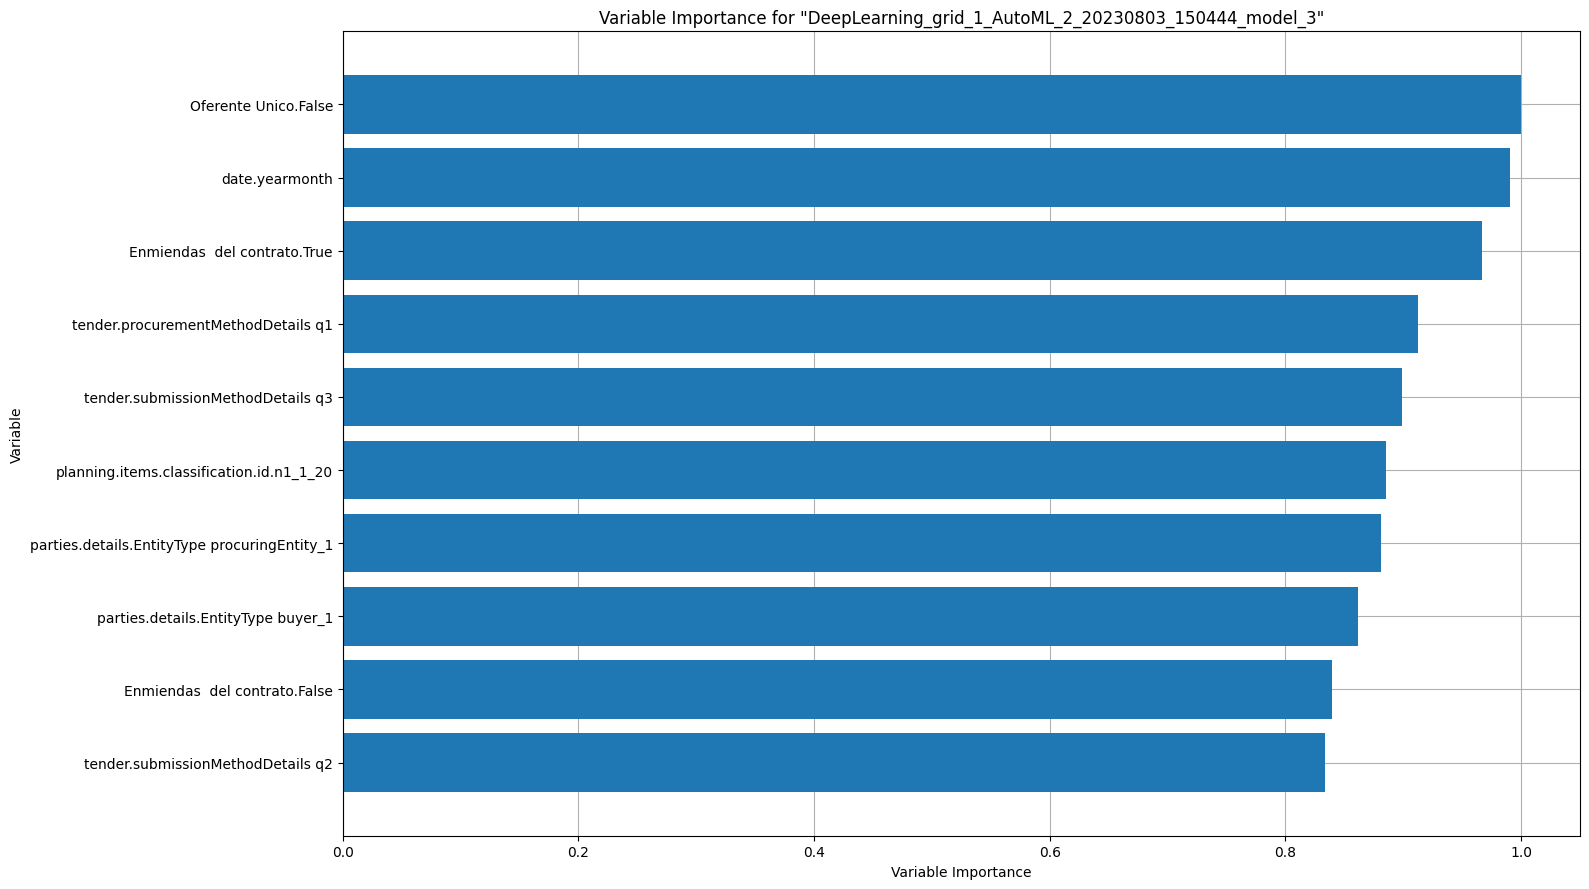

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

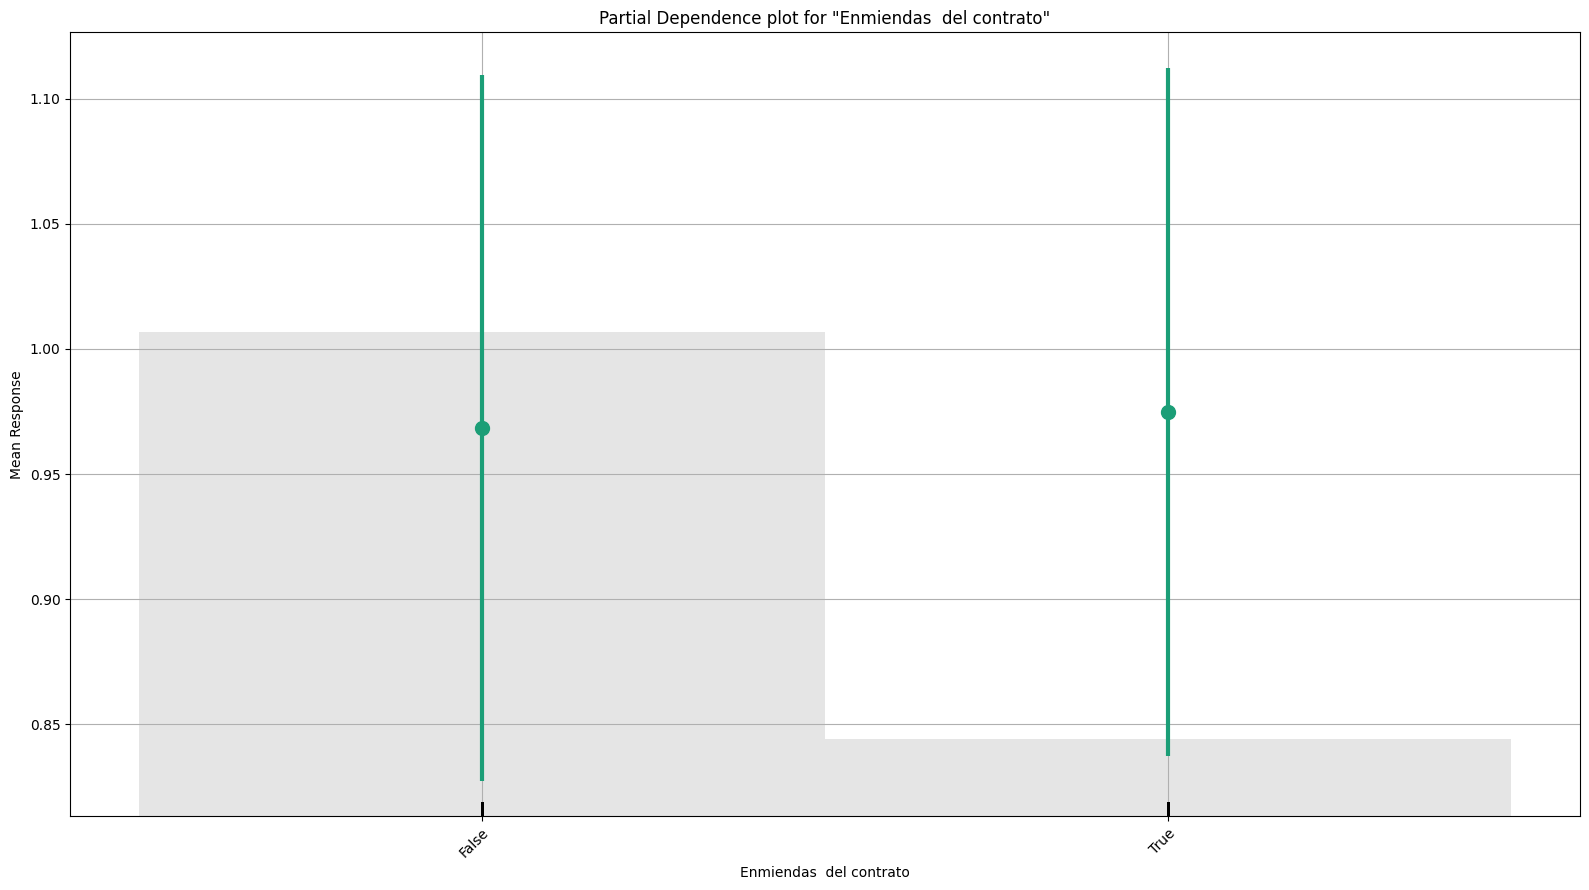

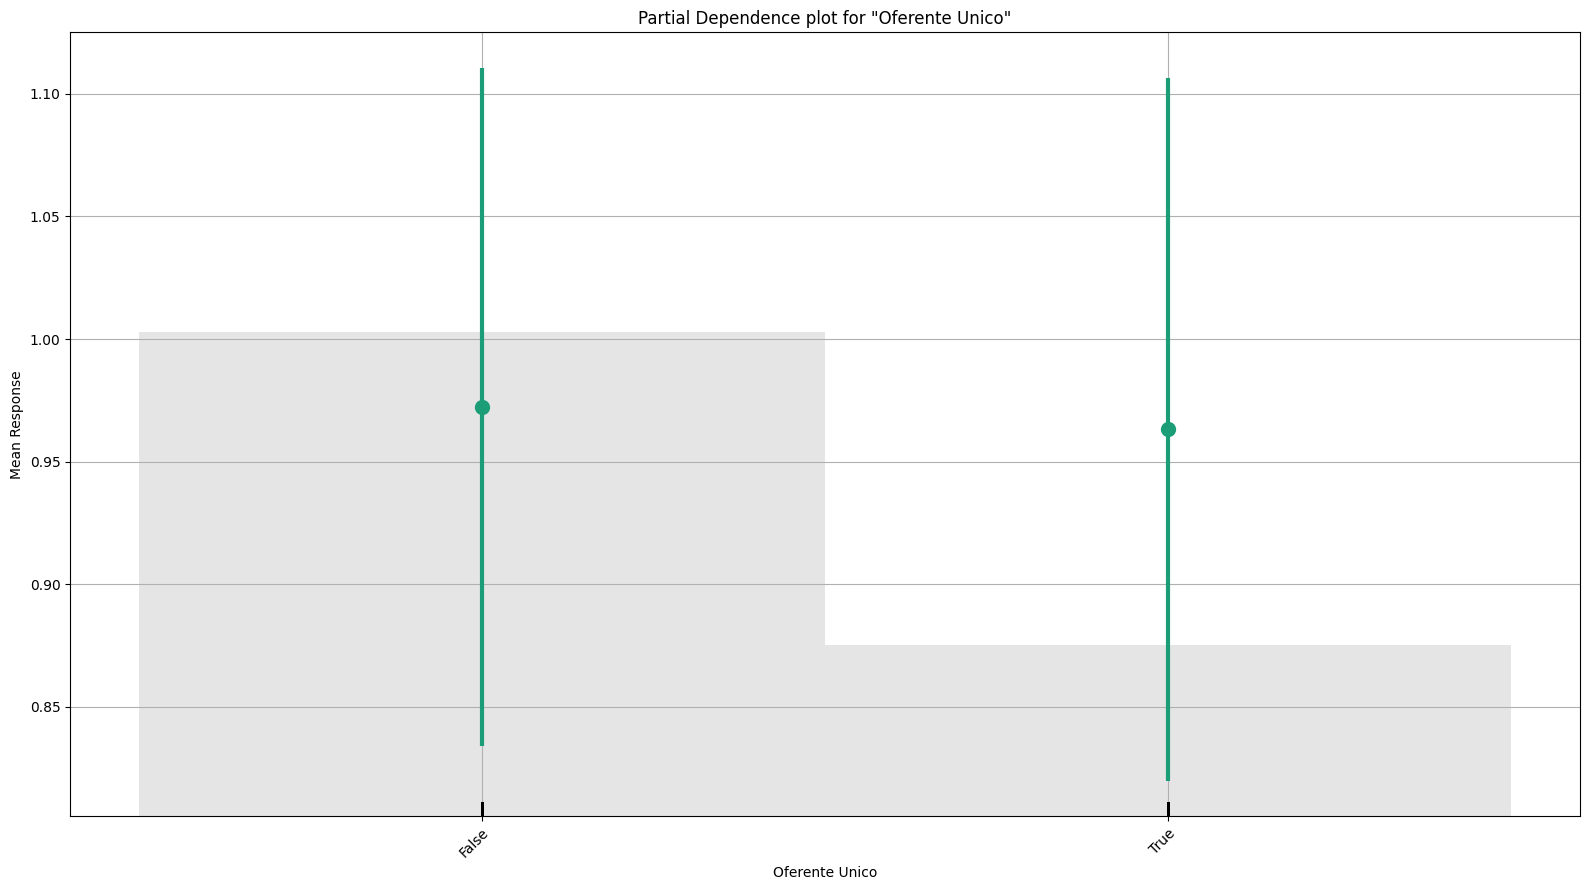

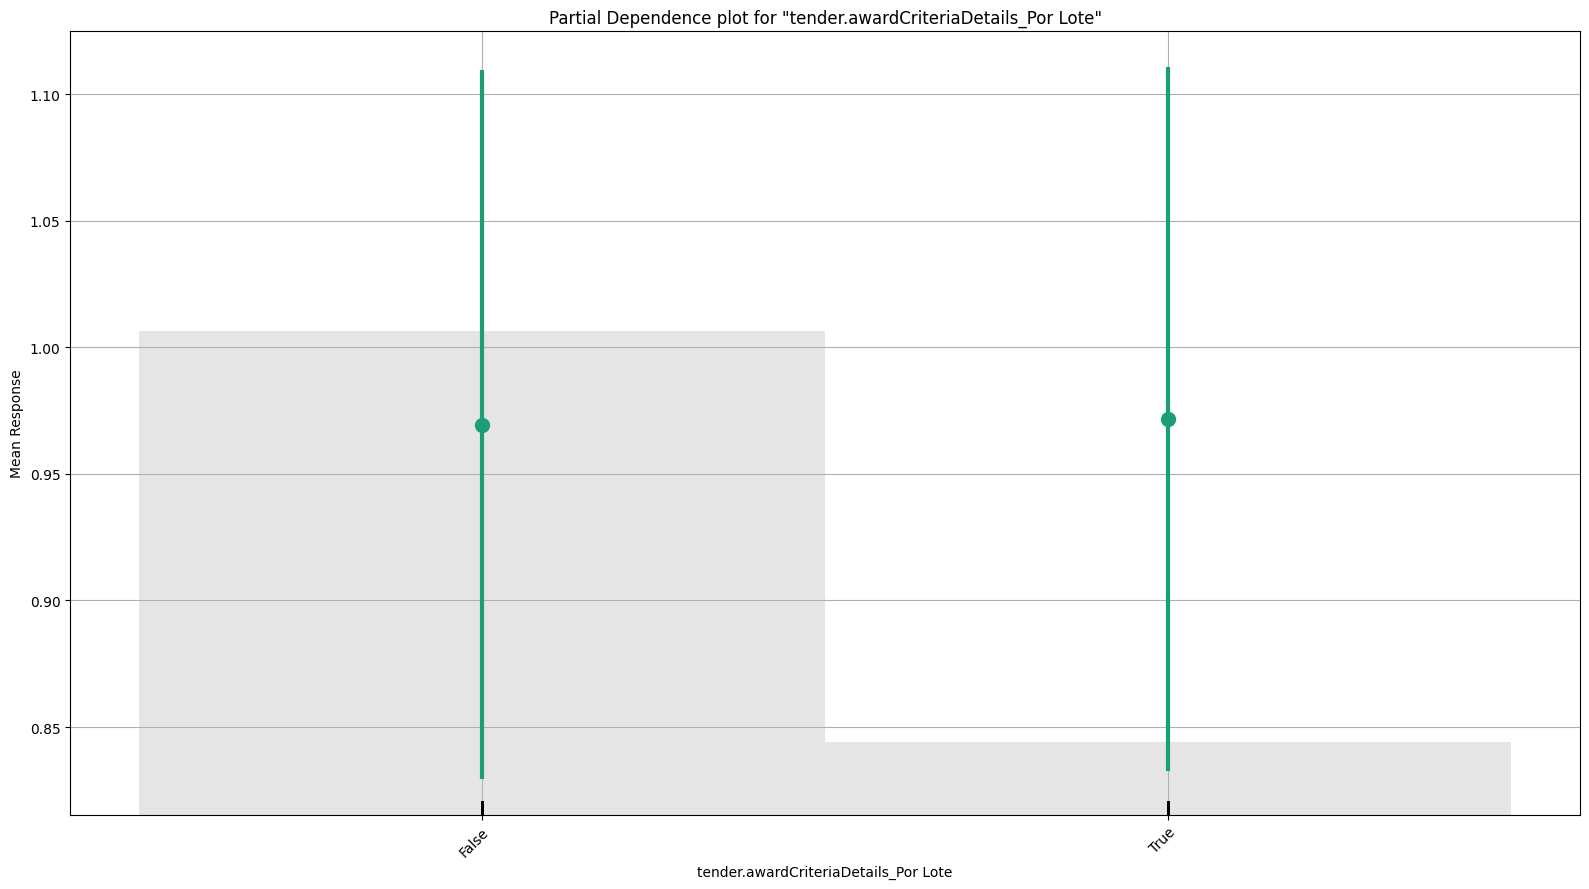

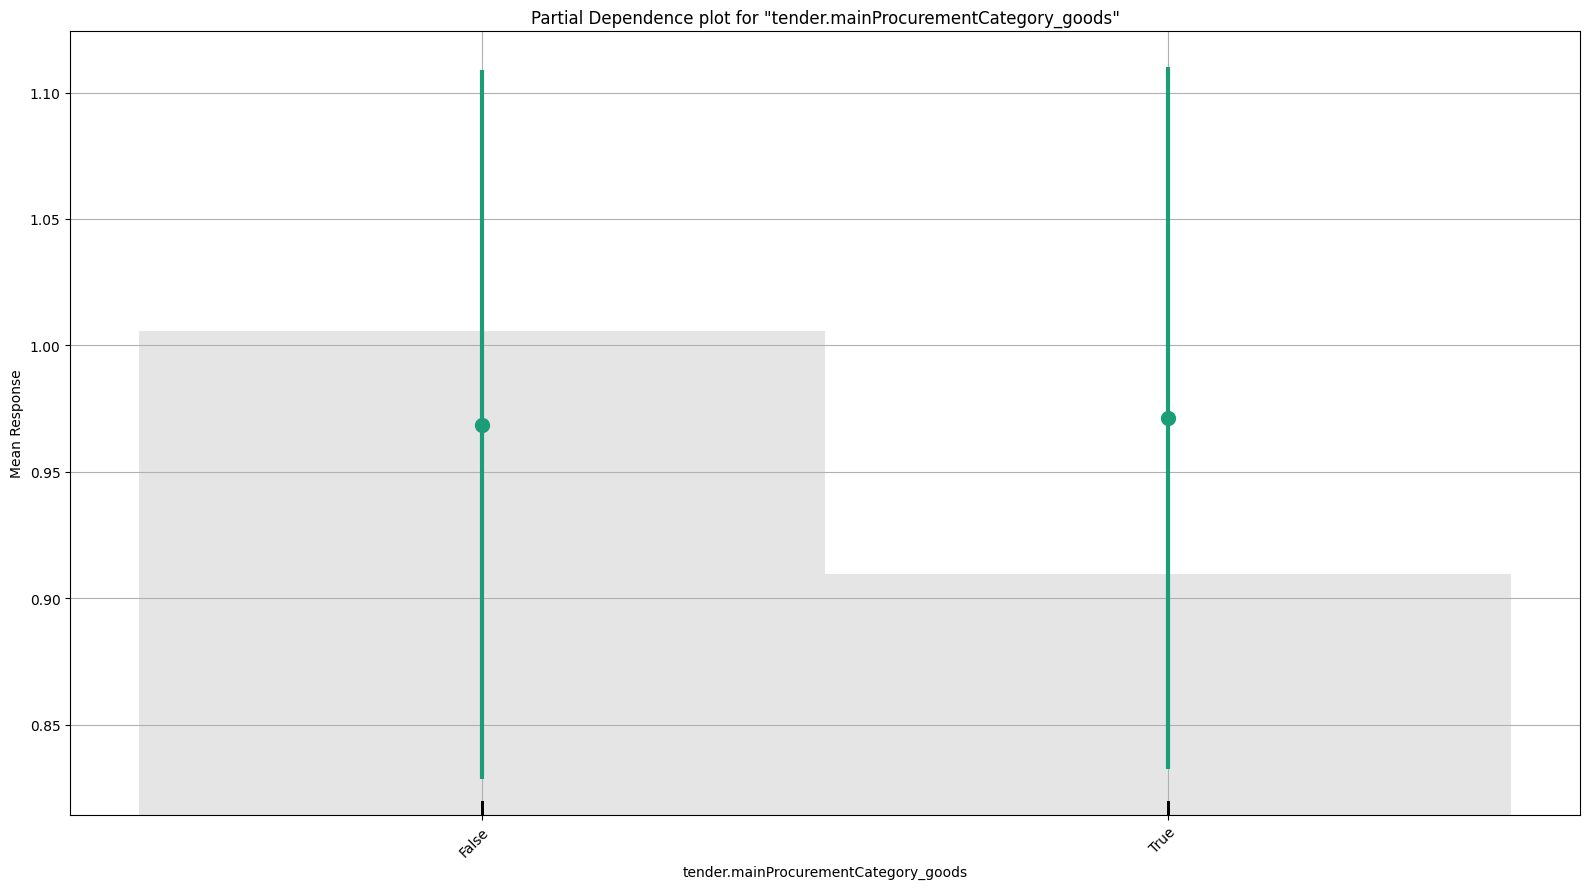

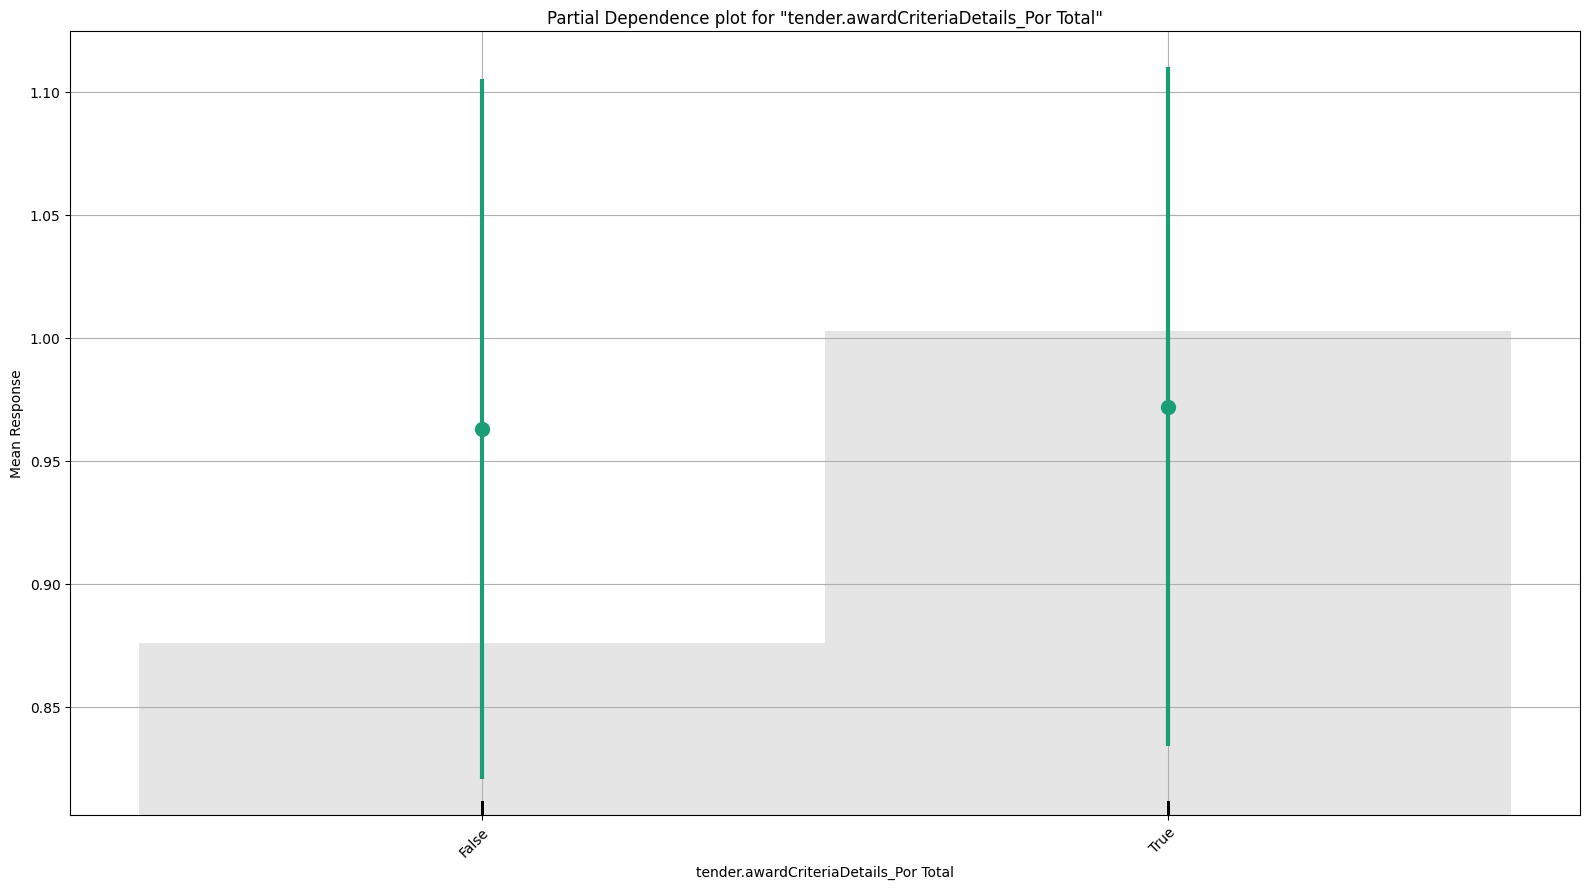

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_2_20230803_150444_model_3

,False,True,Error,Rate
False,15527.0,3139.0,0.1682,(3139.0/18666.0)
True,1102.0,2216.0,0.3321,(1102.0/3318.0)
Total,16629.0,5355.0,0.1929,(4241.0/21984.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [30]:
model.explain(test)

In [38]:
h2o.get_model('StackedEnsemble_BestOfFamily_1_AutoML_8_20230801_04034').model_performance(test).confusion_matrix()

,False,True,Error,Rate
False,16922.0,1744.0,0.0934,(1744.0/18666.0)
True,1479.0,1839.0,0.4458,(1479.0/3318.0)
Total,18401.0,3583.0,0.1466,(3223.0/21984.0)


In [30]:
cm[1][1] / (cm[1][0] + cm[1][1])


0.5533453887884268

In [37]:
type(drf)

h2o.estimators.random_forest.H2ORandomForestEstimator

In [36]:
drf.model_performance(test).recall()[0][0]


0.012416331904275081